In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
from collections import defaultdict
import networkx as nx
import pandas as pd
from itertools import product
import numpy as np
import copy
import math

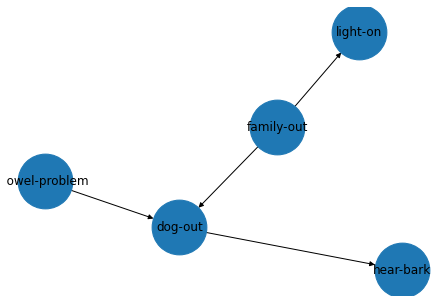

In [2]:
dog_network = BayesNet()
dog_network.load_from_bifxml('testing/dog_problem.BIFXML')
dog_network.draw_structure()

In [3]:
reasoner = BNReasoner(dog_network)

new_cpt = reasoner.get_joint_probability_distribution()
new_cpt

,family-out,light-on,bowel-problem,dog-out,hear-bark,p
0,False,False,False,False,False,0.000624
1,False,False,False,False,True,0.000267
2,False,False,False,True,False,0.0
3,False,False,False,True,True,0.000009
4,False,False,True,False,False,0.060499
5,False,False,True,False,True,0.025928
6,False,False,True,True,False,0.000027
7,False,False,True,True,True,0.002646
8,False,True,False,False,False,0.000416
9,False,True,False,False,True,0.000178
